In [7]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
import os
import cv2 as cv
import mediapipe as mp
from mediapipe.python.solutions.pose import PoseLandmark

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Bidirectional
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [14]:
DATA_PATH = os.path.join('dataset_hand_gestures_1')

actions = np.array(["Start_End", "Maju", "Mundur", "Kanan", "Kiri", "Atas", "Bawah", "Putar_kanan", "Putar_kiri"])

sequence_length = 25

In [15]:
label_map = {label: num for num, label in enumerate(actions)}

sequences, labels = [], []
for action in actions:
    # Filter directories by removing 'sequence_' prefix and converting to int
    for sequence in sorted([int(seq.replace("sequence_", "")) for seq in os.listdir(os.path.join(DATA_PATH, action))]):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, f"sequence_{sequence}", f"frame_{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
np.array(sequences).shape

(135, 25, 63)

In [16]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(94, 25, 63)
(41, 25, 63)
(94, 9)
(41, 9)


# **Build and Train LSTM Neural Network**

In [17]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.summary()

C:\Users\Ardy Pratama\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 25, 64)         │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 25, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,737 (725.54 KB)

 Trainable params: 185,737 (725.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150


C:\Users\Ardy Pratama\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - categorical_accuracy: 0.0724 - loss: 2.1934 - val_categorical_accuracy: 0.1707 - val_loss: 2.1960
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.1079 - loss: 2.1797 - val_categorical_accuracy: 0.1220 - val_loss: 2.1674
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.1001 - loss: 2.1364 - val_categorical_accuracy: 0.1220 - val_loss: 2.0727
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.1001 - loss: 2.0691 - val_categorical_accuracy: 0.1220 - val_loss: 1.9672
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - categorical_accuracy: 0.2040 - loss: 1.9394 - val_categorical_accuracy: 0.2195 - val_loss: 1.8801
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - categorical_accuracy: 0.3066 - loss: 1.8361 - val_categorical_accuracy: 0.3659 - val_loss: 1.6999
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3432 - loss: 1.7955 - val_categoric

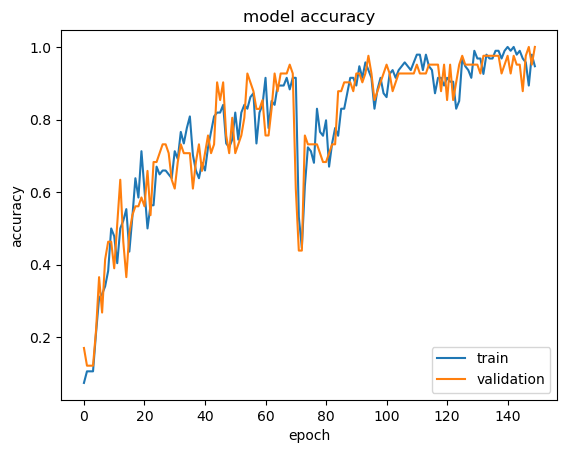

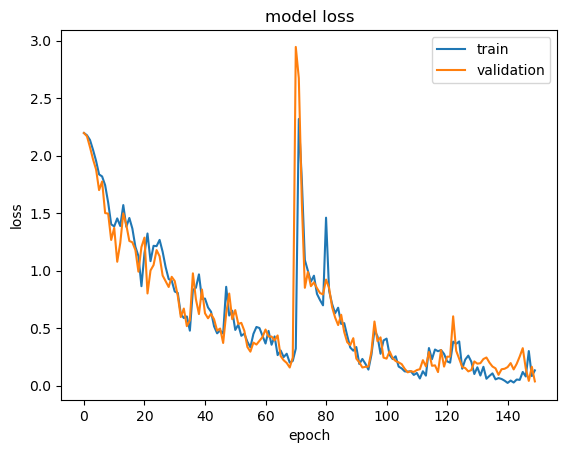

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step
Classification Report:
               precision    recall  f1-score   support

   Start_End       1.00      1.00      1.00         4
        Maju       1.00      1.00      1.00         5
      Mundur       1.00      1.00      1.00         3
       Kanan       1.00      1.00      1.00         5
        Kiri       1.00      1.00      1.00         2
        Atas       1.00      1.00      1.00         5
       Bawah       1.00      1.00      1.00         7
 Putar_kanan       1.00      1.00      1.00         6
  Putar_kiri       1.00      1.00      1.00         4

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



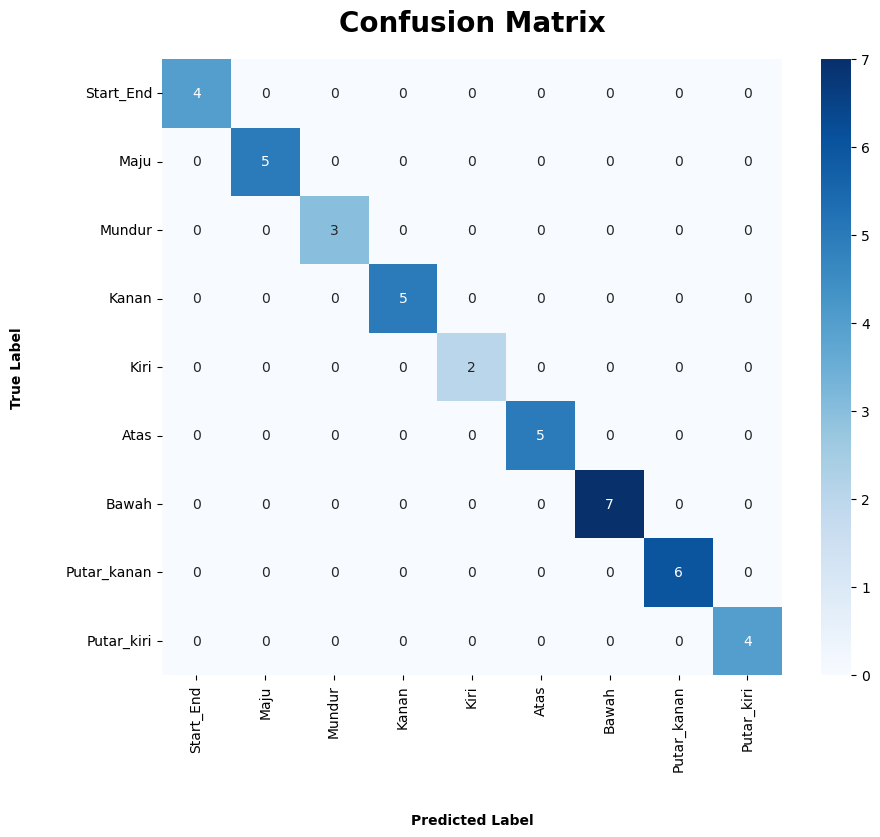

Model Accuracy: 1.00


In [20]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Model training
train_model = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

# Plot training accuracy and loss
plt.plot(train_model.history['categorical_accuracy'])
plt.plot(train_model.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Evaluate the model
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1)
yhat_classes = np.argmax(yhat, axis=1)

# Generate classification report
report = classification_report(ytrue, yhat_classes, target_names=actions)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat_classes)
plt.figure(figsize=(10, 8))
heatMap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
heatMap.set_xlabel('Predicted Label', labelpad=30, weight='bold')
heatMap.set_ylabel('True Label', labelpad=30, weight='bold')
heatMap.set_title('Confusion Matrix', pad=20, weight='bold', fontsize=20)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(ytrue, yhat_classes)
print(f"Model Accuracy: {accuracy:.2f}")

# **Save original model and the tflite model**

In [21]:
# Conversion to TFLite model
number_of_classes = len(actions)
current_date = 'acc100'  # changes manually
version = 3

# Original Keras model filename
model_filename = "model/model_" + \
    str(number_of_classes) + '_' + 'lstm' + '_' + \
    current_date + '_' + str(version) + ".h5"

# Save the original model
print(model_filename)
model.save(model_filename)

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_filename = "model/model_" + \
    str(number_of_classes) + '_' + 'lstm' + '_' + \
    current_date + '_' + str(version) + ".tflite"

with open(tflite_model_filename, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved as {tflite_model_filename}")

model/model_9_lstm_acc100_3.h5
INFO:tensorflow:Assets written to: C:\Users\ARDYPR~1\AppData\Local\Temp\tmp91y3_hvj\assets


INFO:tensorflow:Assets written to: C:\Users\ARDYPR~1\AppData\Local\Temp\tmp91y3_hvj\assets


Saved artifact at 'C:\Users\ARDYPR~1\AppData\Local\Temp\tmp91y3_hvj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 25, 63), dtype=tf.float32, name='keras_tensor_203')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  2784487263696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784535952464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784535942288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784535940752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784535952656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784535952848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784669771216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784669774096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784669775632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784669774864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  278